# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import math
import os
import csv
from datetime import datetime



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [74]:

url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
city_dict = {
    "City": [],
    "Lat": [],
    "Lag":[],
    "Max temp":[],
    "Humidity":[],
    "Cloudiness":[],
    "Wind speed":[],
    "Country":[],
    "Date":[]
}
print("Beginning Data Retrieval")
print("-------------------------")
count = 0
for city in cities:
    city_response=requests.get(query_url + city).json()
    if city_response["cod"] == 200 :
        print(f"Processing record {count%50} Set {(math.floor(count/50)+1)} : | {city}")
        city_dict['City'].append(city_response["name"])
        city_dict['Lat'].append(city_response["coord"]["lat"])
        city_dict['Lag'].append(city_response["coord"]["lon"])
        city_dict['Max temp'].append(city_response["main"]["temp_max"])
        city_dict['Humidity'].append(city_response["main"]["humidity"])
        city_dict['Cloudiness'].append(city_response["clouds"]["all"])
        city_dict['Wind speed'].append(city_response["wind"]["speed"])
        city_dict['Country'].append(city_response["sys"]["country"])
        city_dict['Date'].append(city_response["dt"])

    else:
        print(f"{city_response['message']}. Skipping...")
    count += 1
    if count % 50 == 0:
        time.sleep(60)
print("-------------------------")
print("Data Retrieval Complete ")
print("-------------------------")
len(date)

Beginning Data Retrieval
-------------------------
Processing record 0 Set 1 : | dhidhdhoo
Processing record 1 Set 1 : | moron
Processing record 2 Set 1 : | san patricio
Processing record 3 Set 1 : | quatre cocos
Processing record 4 Set 1 : | clyde river
Processing record 5 Set 1 : | chuy
Processing record 6 Set 1 : | karlskoga
Processing record 7 Set 1 : | severo-kurilsk
Processing record 8 Set 1 : | samana
city not found. Skipping...
Processing record 10 Set 1 : | tuktoyaktuk
Processing record 11 Set 1 : | anadyr
Processing record 12 Set 1 : | makakilo city
Processing record 13 Set 1 : | esperance
Processing record 14 Set 1 : | bluff
Processing record 15 Set 1 : | cape town
city not found. Skipping...
city not found. Skipping...
Processing record 18 Set 1 : | saint george
city not found. Skipping...
Processing record 20 Set 1 : | port macquarie
Processing record 21 Set 1 : | ushuaia
Processing record 22 Set 1 : | faya
Processing record 23 Set 1 : | atar
Processing record 24 Set 1 : |

552

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [111]:
city_data = pd.DataFrame(city_dict)
city_data.head()

,City,Lat,Lag,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Dhidhdhoo,6.88,73.10,301.35,77,95,5.84,MV,1607097559
1,Morón,-34.65,-58.62,297.59,34,91,4.02,AR,1607097577
2,San Patricio,28.02,-97.52,282.04,65,90,5.70,US,1607097577
3,Quatre Cocos,-20.21,57.76,299.26,78,75,4.60,MU,1607097577
4,Clyde River,70.47,-68.59,258.15,84,90,10.30,CA,1607097578


In [76]:
output_path = os.path.join("output_data", "city_data.csv")
city_csv=city_data.to_csv(output_path, sep = ",", index=False)


None


In [77]:
satistics_summary=city_data[["Lat","Lag","Max temp","Humidity","Cloudiness","Wind speed","Date"]].describe()
satistics_summary

,Lat,Lag,Max temp,Humidity,Cloudiness,Wind speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.883768,14.103496,285.768877,71.126812,52.063406,3.999601,1.607098e+09
std,33.422411,90.745642,15.425646,20.686543,38.127182,2.822409,2.441040e+02
min,-54.800000,-179.170000,239.470000,2.000000,0.000000,0.200000,1.607097e+09
25%,-8.697500,-63.562500,275.210000,62.000000,11.750000,1.985000,1.607098e+09
50%,23.060000,15.880000,289.940000,77.000000,59.000000,3.200000,1.607098e+09
75%,48.852500,95.522500,299.072500,86.000000,90.000000,5.475000,1.607098e+09
max,78.220000,179.320000,311.560000,100.000000,100.000000,14.900000,1.607098e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## I checked city_csv file and filtered the humidity over 100 and no city has humidity over 100
![](./output_data/humidity.png)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

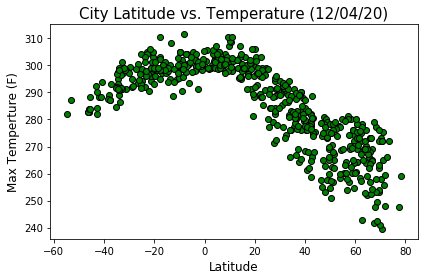

In [200]:
lat = city_data["Lat"]
max_temp=city_data["Max temp"]

plt.scatter(lat,max_temp,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max Temperture (F)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')

plt.title(f"City Latitude vs. Temperature ({date})",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs.Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

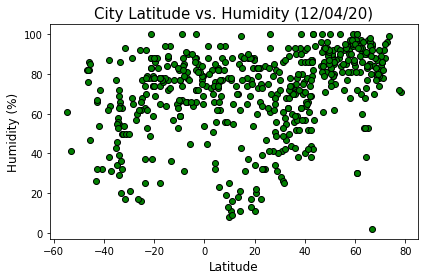

In [201]:
lat = city_data["Lat"]
humidity=city_data["Humidity"]

plt.scatter(lat,humidity,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity (%)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({date})",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

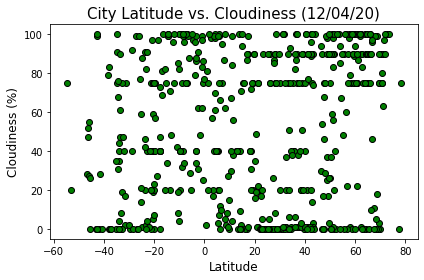

In [202]:
lat = city_data["Lat"]
cloudiness=city_data["Cloudiness"]

plt.scatter(lat,cloudiness,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness (%)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Cloudiness ({date})",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

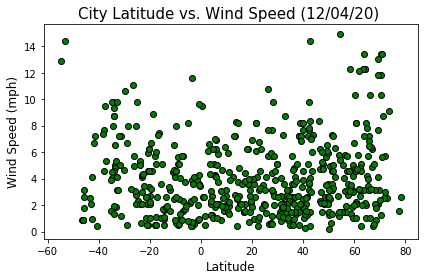

In [203]:
lat = city_data["Lat"]
wind_speed=city_data["Wind speed"]

plt.scatter(lat,wind_speed,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed (mph)",fontsize=12)
now = datetime.now()
date=now.strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Wind Speed ({date}) ",fontsize=15)
plt.tight_layout()
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

plt.show()

## Linear Regression

In [146]:
northern = city_data[city_data["Lat"] >= 0].reset_index().drop(["index"],axis=1)
northern.head()

,City,Lat,Lag,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Dhidhdhoo,6.88,73.10,301.35,77,95,5.84,MV,1607097559
1,San Patricio,28.02,-97.52,282.04,65,90,5.70,US,1607097577
2,Clyde River,70.47,-68.59,258.15,84,90,10.30,CA,1607097578
3,Karlskoga,59.33,14.52,276.15,100,90,3.10,SE,1607097578
4,Severo-Kuril'sk,50.68,156.12,270.39,89,59,4.97,RU,1607097578


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [145]:
southren=city_data[city_data["Lat"]< 0].reset_index().drop(["index"],axis=1)
southren.head()

,City,Lat,Lag,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Morón,-34.65,-58.62,297.59,34,91,4.02,AR,1607097577
1,Quatre Cocos,-20.21,57.76,299.26,78,75,4.60,MU,1607097577
2,Chui,-33.70,-53.46,291.94,66,61,5.02,UY,1607097578
3,Esperance,-33.87,121.90,289.15,72,4,9.30,AU,1607097578
4,Bluff,-46.60,168.33,282.59,82,28,0.89,NZ,1607097579


The r-value is: -0.8679116077404073


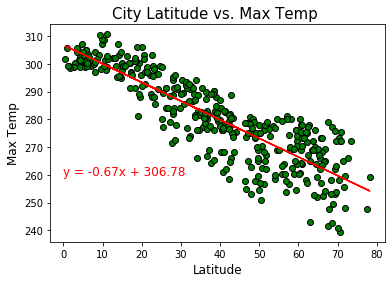

In [204]:
lat_north=northern["Lat"]
max_temp_north=northern["Max temp"]
plt.scatter(lat_north,max_temp_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max Temp",fontsize=12)
plt.title("City Latitude vs. Max Temp ",fontsize=15)
correlation=st.pearsonr(lat_north,max_temp_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, max_temp_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(0,260),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Max Temp.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.701204961153719


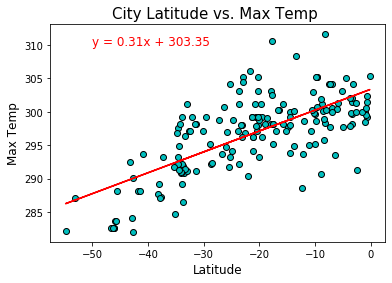

In [205]:
lat_south=southren["Lat"]
max_temp_south=southren["Max temp"]
plt.scatter(lat_south,max_temp_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max Temp",fontsize=12)
plt.title("City Latitude vs. Max Temp ",fontsize=15)
correlation=st.pearsonr(lat_south,max_temp_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, max_temp_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-50,310),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Max Temp.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.40287713717408125


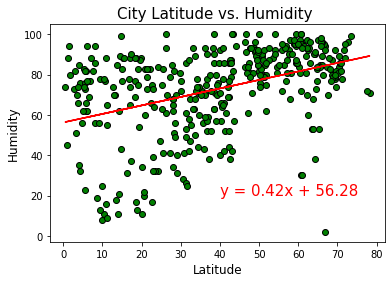

In [207]:
lat_north=northern["Lat"]
humidity_north=northern["Humidity"]
plt.scatter(lat_north,humidity_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.title("City Latitude vs. Humidity ",fontsize=15)
correlation=st.pearsonr(lat_north,humidity_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humidity_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(40,20),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northren City Latitude vs. Humidity.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36856483146143204


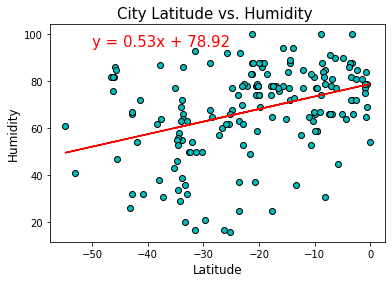

In [208]:
lat_south=southren["Lat"]
humidity_south=southren["Humidity"]
plt.scatter(lat_south,humidity_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.title("City Latitude vs. Humidity ",fontsize=15)
correlation=st.pearsonr(lat_south,humidity_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,humidity_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-50,95),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Humidity.png")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.214589353958854


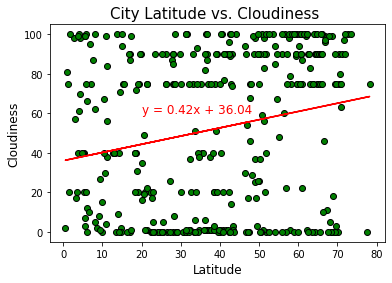

In [209]:
lat_north=northern["Lat"]
cloudiness_north=northern["Cloudiness"]
plt.scatter(lat_north,cloudiness_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.title("City Latitude vs. Cloudiness ",fontsize=15)
correlation=st.pearsonr(lat_north,cloudiness_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloudiness_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(20,60),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Cloudiness.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.36839969211925394


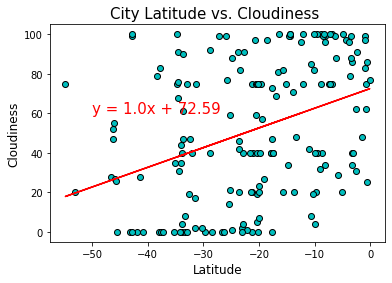

In [210]:
lat_south=southren["Lat"]
cloudiness_south=southren["Cloudiness"]
plt.scatter(lat_south,cloudiness_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.title("City Latitude vs. Cloudiness ",fontsize=15)
correlation=st.pearsonr(lat_south,cloudiness_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,cloudiness_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-50,60),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Cloudiness.png")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1959513828266928


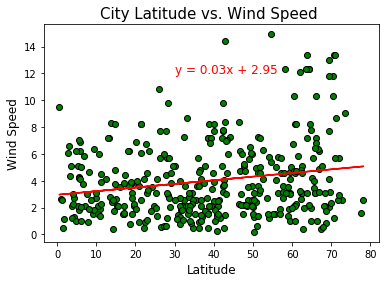

In [211]:
lat_north=northern["Lat"]
wind_speed_north=northern["Wind speed"]
plt.scatter(lat_north,wind_speed_north,color="g",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.title("City Latitude vs. Wind Speed ",fontsize=15)
correlation=st.pearsonr(lat_north,wind_speed_north)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_speed_north)
regress_values = lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_north,regress_values,"r")
plt.annotate(line_eq,(30,12),fontsize=12,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Northern City Latitude vs. Wind Speed.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.26549377459700935


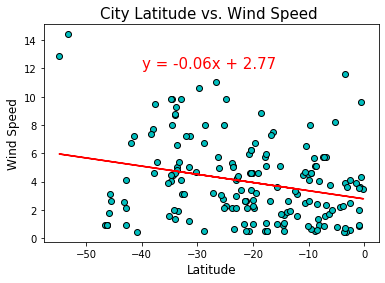

In [212]:
lat_south=southren["Lat"]
wind_speed_south=southren["Wind speed"]
plt.scatter(lat_south,wind_speed_south,color="c",edgecolors="k",alpha=1)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.title("City Latitude vs. Wind Speed ",fontsize=15)
correlation=st.pearsonr(lat_south,wind_speed_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,wind_speed_south)
regress_values = lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat_south,regress_values,"r")
plt.annotate(line_eq,(-40,12),fontsize=15,color='r')
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Linear Southern City Latitude vs. Wind Speed.png")

plt.show()
